In [ ]:
###---------------
# Project HIA302 Group B 
# Isaac Kong
# Adverse Event Following Immunization (aefi) Trends 
###----------------

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os, sys


In [2]:
%%bash 

### Cloning database directly from github MOH-Malaysia/covid19-public
# git clone https://github.com/MoH-Malaysia/covid19-public.git
### Remove .git after cloning to avoid having a repo inside a repo
# rm -rf covid19-public/.git 

In [3]:
#create data path to access data file from path 
data_path="covid19-public/vaccination/"

# to show the all files in the data_path 
vax_files = os.listdir(data_path)
vax_files

['vax_district.csv',
 'vax_booster_combos.csv',
 'vax_demog_ethnicity.csv',
 'aefi.csv',
 'vax_outcomes_capita.csv',
 'vax_demog_highrisk.csv',
 'vax_demog_sex.csv',
 'vax_malaysia.csv',
 'README.md',
 'vax_state.csv',
 'aefi_serious.csv',
 'vax_demog_nationality.csv',
 'vax_snapshot.csv',
 '.ipynb_checkpoints',
 'vax_demog_age_children.csv',
 'vax_school.csv',
 'vax_demog_age.csv']

In [4]:
pd.read_csv(os.path.join(data_path, "aefi.csv")).describe()

,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,d1_site_redness,d1_tiredness,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,...,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,663.487837,1.220907,662.261670,16.099934,606.224852,39.944773,427.847469,98.744247,32.109139,327.448389,...,2.238659,18.797502,15.786982,10.345168,5.865878,10.736358,6.130178,5.038790,4.915187,1.603550
std,1296.677983,2.262360,1295.746836,32.543501,1237.919429,131.308975,927.087027,242.470757,78.417766,734.216588,...,7.552900,62.278923,49.273572,35.737454,18.749222,34.865071,19.075960,17.567253,16.167464,5.800745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,20.000000,3.000000,8.000000,0.000000,6.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.000000,2.000000,674.000000,14.000000,535.000000,21.000000,330.000000,58.000000,21.000000,234.000000,...,1.000000,10.000000,8.000000,5.000000,3.000000,5.000000,4.000000,2.000000,3.000000,1.000000
max,8905.000000,21.000000,8901.000000,374.000000,8810.000000,1787.000000,6854.000000,3839.000000,927.000000,5883.000000,...,111.000000,867.000000,679.000000,503.000000,266.000000,481.000000,216.000000,270.000000,199.000000,88.000000


In [5]:
# identify the extension (file type)
filename, filext = os.path.splitext(vax_files[8])

filext

if(filext == '.csv'):
    print('this is a CSV')
else:
    print('this is not a csv file')
filename

this is not a csv file


'README'

In [6]:
# to read the dataframe for aefi 
pd.read_csv(os.path.join(data_path, "aefi.csv"))

,date,vaxtype,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,5,0,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,2,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,4,0,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,12,1,11,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,3,0,3,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# to read the dataframe for aefi_serious 
pd.read_csv(os.path.join(data_path, "aefi_serious.csv"))

,date,vaxtype,suspected_anaphylaxis,acute_facial_paralysis,venous_thromboembolism,myo_pericarditis
0,2021-05-09,astrazeneca,0,2,5,0
1,2021-05-09,cansino,0,0,0,0
2,2021-05-09,pfizer,31,37,15,2
3,2021-05-09,sinovac,8,27,10,0
4,2021-08-23,astrazeneca,0,1,2,0
5,2021-08-23,cansino,0,0,0,0
6,2021-08-23,pfizer,30,27,10,0
7,2021-08-23,sinovac,7,16,6,0
8,2021-09-23,astrazeneca,5,9,5,1
9,2021-09-23,cansino,0,0,0,0


In [8]:
### Create data repository holiding all datasets for vacincations 

data_repo = dict()

for file in vax_files:
    file_path = os.path.join(data_path, file)
    filename, filext = os.path.splitext(file)

    if(filext == ".csv"):
        print(file_path)
        tmp_df = pd.read_csv(file_path)
        data_repo[filename] = tmp_df.copy()
        
data_repo.keys()

covid19-public/vaccination/vax_district.csv
covid19-public/vaccination/vax_booster_combos.csv
covid19-public/vaccination/vax_demog_ethnicity.csv
covid19-public/vaccination/aefi.csv
covid19-public/vaccination/vax_outcomes_capita.csv
covid19-public/vaccination/vax_demog_highrisk.csv
covid19-public/vaccination/vax_demog_sex.csv
covid19-public/vaccination/vax_malaysia.csv
covid19-public/vaccination/vax_state.csv
covid19-public/vaccination/aefi_serious.csv
covid19-public/vaccination/vax_demog_nationality.csv
covid19-public/vaccination/vax_snapshot.csv
covid19-public/vaccination/vax_demog_age_children.csv
covid19-public/vaccination/vax_school.csv
covid19-public/vaccination/vax_demog_age.csv


dict_keys(['vax_district', 'vax_booster_combos', 'vax_demog_ethnicity', 'aefi', 'vax_outcomes_capita', 'vax_demog_highrisk', 'vax_demog_sex', 'vax_malaysia', 'vax_state', 'aefi_serious', 'vax_demog_nationality', 'vax_snapshot', 'vax_demog_age_children', 'vax_school', 'vax_demog_age'])

In [9]:
# Perform data check to identify missing value or data completeness 
aefi = data_repo['aefi'].copy()

aefi_serious = data_repo['aefi_serious'].copy()

print(aefi.info())
print(aefi_serious.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         1521 non-null   object
 1   vaxtype                      1521 non-null   object
 2   daily_total                  1521 non-null   int64 
 3   daily_serious_npra           1521 non-null   int64 
 4   daily_nonserious             1521 non-null   int64 
 5   daily_nonserious_npra        1521 non-null   int64 
 6   daily_nonserious_mysj_dose1  1521 non-null   int64 
 7   daily_nonserious_mysj_dose2  1521 non-null   int64 
 8   d1_site_pain                 1521 non-null   int64 
 9   d1_site_swelling             1521 non-null   int64 
 10  d1_site_redness              1521 non-null   int64 
 11  d1_tiredness                 1521 non-null   int64 
 12  d1_headache                  1521 non-null   int64 
 13  d1_muscle_pain               1521

In [10]:
# Merging of 2 dataframes (aefi & aefi_serious) into one by 'date' and 'vaxtype'
aefi_full = aefi_serious.merge(aefi, on=['date', 'vaxtype'], how='right')
aefi_full

,date,vaxtype,suspected_anaphylaxis,acute_facial_paralysis,venous_thromboembolism,myo_pericarditis,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,NaN,NaN,NaN,NaN,5,0,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,NaN,NaN,NaN,NaN,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,NaN,NaN,NaN,NaN,4,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,NaN,NaN,NaN,NaN,12,1,11,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,NaN,NaN,NaN,NaN,3,0,3,1,...,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#data wrangling step 1 for dose 1

### Select only columns that start with 'd1'
filter_col_d1 = list(aefi_full.columns[aefi_full.columns.str.startswith("d1_")])

### Create a datafrane that has only date, vaxtype, and columns starting with d1
aefi_dose1_final = aefi_full.loc[: ,["date" , "vaxtype"]+ filter_col_d1]
aefi_dose1_final

,date,vaxtype,d1_site_pain,d1_site_swelling,d1_site_redness,d1_tiredness,d1_headache,d1_muscle_pain,d1_joint_pain,d1_weakness,d1_fever,d1_vomiting,d1_chills,d1_rash
0,2021-01-13,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,0,0,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,0,0,0,0,0,0,0,0,1,0,0,0
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#data wrangling step 1 for dose 2

### Select columns that start with 'd2'
filter_col_d2 = list(aefi_full.columns[aefi_full.columns.str.startswith("d2_")])

### Create a datafrane that has only date, vaxtype, and columns starting with d2
aefi_dose2_final = aefi_full.loc[: ,["date" , "vaxtype"]+ filter_col_d2]
aefi_dose2_final


,date,vaxtype,d2_site_pain,d2_site_swelling,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,0,0,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,1,1,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
aefi_dose2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1521 non-null   object
 1   vaxtype           1521 non-null   object
 2   d2_site_pain      1521 non-null   int64 
 3   d2_site_swelling  1521 non-null   int64 
 4   d2_site_redness   1521 non-null   int64 
 5   d2_tiredness      1521 non-null   int64 
 6   d2_headache       1521 non-null   int64 
 7   d2_muscle_pain    1521 non-null   int64 
 8   d2_joint_pain     1521 non-null   int64 
 9   d2_weakness       1521 non-null   int64 
 10  d2_fever          1521 non-null   int64 
 11  d2_vomiting       1521 non-null   int64 
 12  d2_chills         1521 non-null   int64 
 13  d2_rash           1521 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 178.2+ KB


In [14]:
# data rearrangement Unpivot a DataFrame from wide to long format using pandas (pd.wide_to_long) for dose 1

# dose 1
aefi_dose1_l = pd.wide_to_long(aefi_dose1_final, stubnames='d1', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose1_l.rename(columns = {'d1':'count'}, inplace = True)
# 
aefi_dose1_l["dose"]=1
aefi_dose1_l

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     1
                       site_swelling      0     1
                       site_redness       0     1
                       tiredness          0     1
                       headache           0     1
...                                     ...   ...
2022-06-07 sinovac     weakness           0     1
                       fever              0     1
                       vomiting           0     1
                       chills             0     1
                       rash               0     1

[18252 rows x 2 columns]

In [15]:
aefi_dose1_l[(aefi_dose1_l['count']>0)]


count  dose
date       vaxtype AE                        
2021-03-06 pfizer  site_pain        261     1
                   site_swelling     40     1
                   site_redness      18     1
                   tiredness        149     1
                   headache         141     1
...                                 ...   ...
2022-06-03 pfizer  muscle_pain        1     1
                   weakness           1     1
                   fever              2     1
                   chills             1     1
2022-06-07 pfizer  fever              1     1

[10369 rows x 2 columns]

In [16]:

tmp = aefi_dose1_final.groupby(['date','vaxtype']).sum()

tmp_stack = pd.DataFrame(tmp.stack()).rename(columns={0: 'count'})

tmp_stack.index.names = ['date', 'vaxtype', 'AE']
tmp_stack['dose'] = 1 

tmp_stack

count  dose
date       vaxtype     AE                           
2021-01-13 astrazeneca d1_site_pain          0     1
                       d1_site_swelling      0     1
                       d1_site_redness       0     1
                       d1_tiredness          0     1
                       d1_headache           0     1
...                                        ...   ...
2022-06-07 sinovac     d1_weakness           0     1
                       d1_fever              0     1
                       d1_vomiting           0     1
                       d1_chills             0     1
                       d1_rash               0     1

[18252 rows x 2 columns]

In [17]:
tmp_stack

count  dose
date       vaxtype     AE                           
2021-01-13 astrazeneca d1_site_pain          0     1
                       d1_site_swelling      0     1
                       d1_site_redness       0     1
                       d1_tiredness          0     1
                       d1_headache           0     1
...                                        ...   ...
2022-06-07 sinovac     d1_weakness           0     1
                       d1_fever              0     1
                       d1_vomiting           0     1
                       d1_chills             0     1
                       d1_rash               0     1

[18252 rows x 2 columns]

In [18]:
# data rearrangement Unpivot a DataFrame from wide to long format using pandas (pd.wide_to_long) for dose 2

# dose 2
aefi_dose2_l = pd.wide_to_long(aefi_dose2_final, stubnames='d2', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose2_l.rename(columns = {'d2':'count'}, inplace = True)
# 
aefi_dose2_l["dose"]=2
aefi_dose2_l

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     2
                       site_swelling      0     2
                       site_redness       0     2
                       tiredness          0     2
                       headache           0     2
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[18252 rows x 2 columns]

<AxesSubplot:title={'center':'Top 10 Adverse Events Following Immunization on Dose 1'}, ylabel='count'>

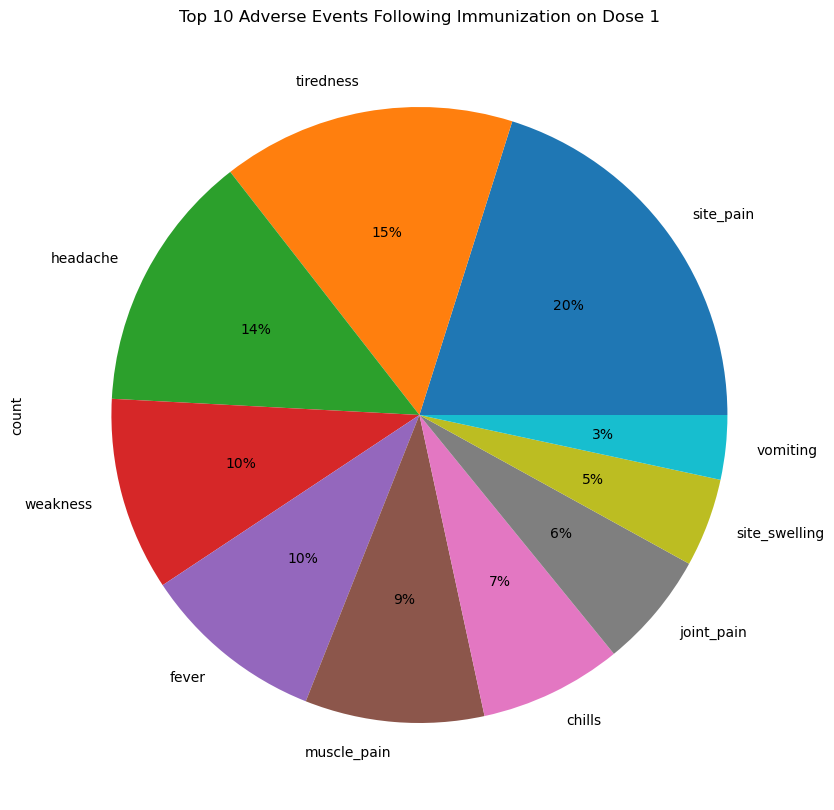

In [19]:
# dose1 AEFI Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose1_summ = aefi_dose1_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose1_summ.plot(kind='pie', y='count', figsize=(50,10), autopct='%1.0f%%',
                     title = 'Top 10 Adverse Events Following Immunization on Dose 1' )


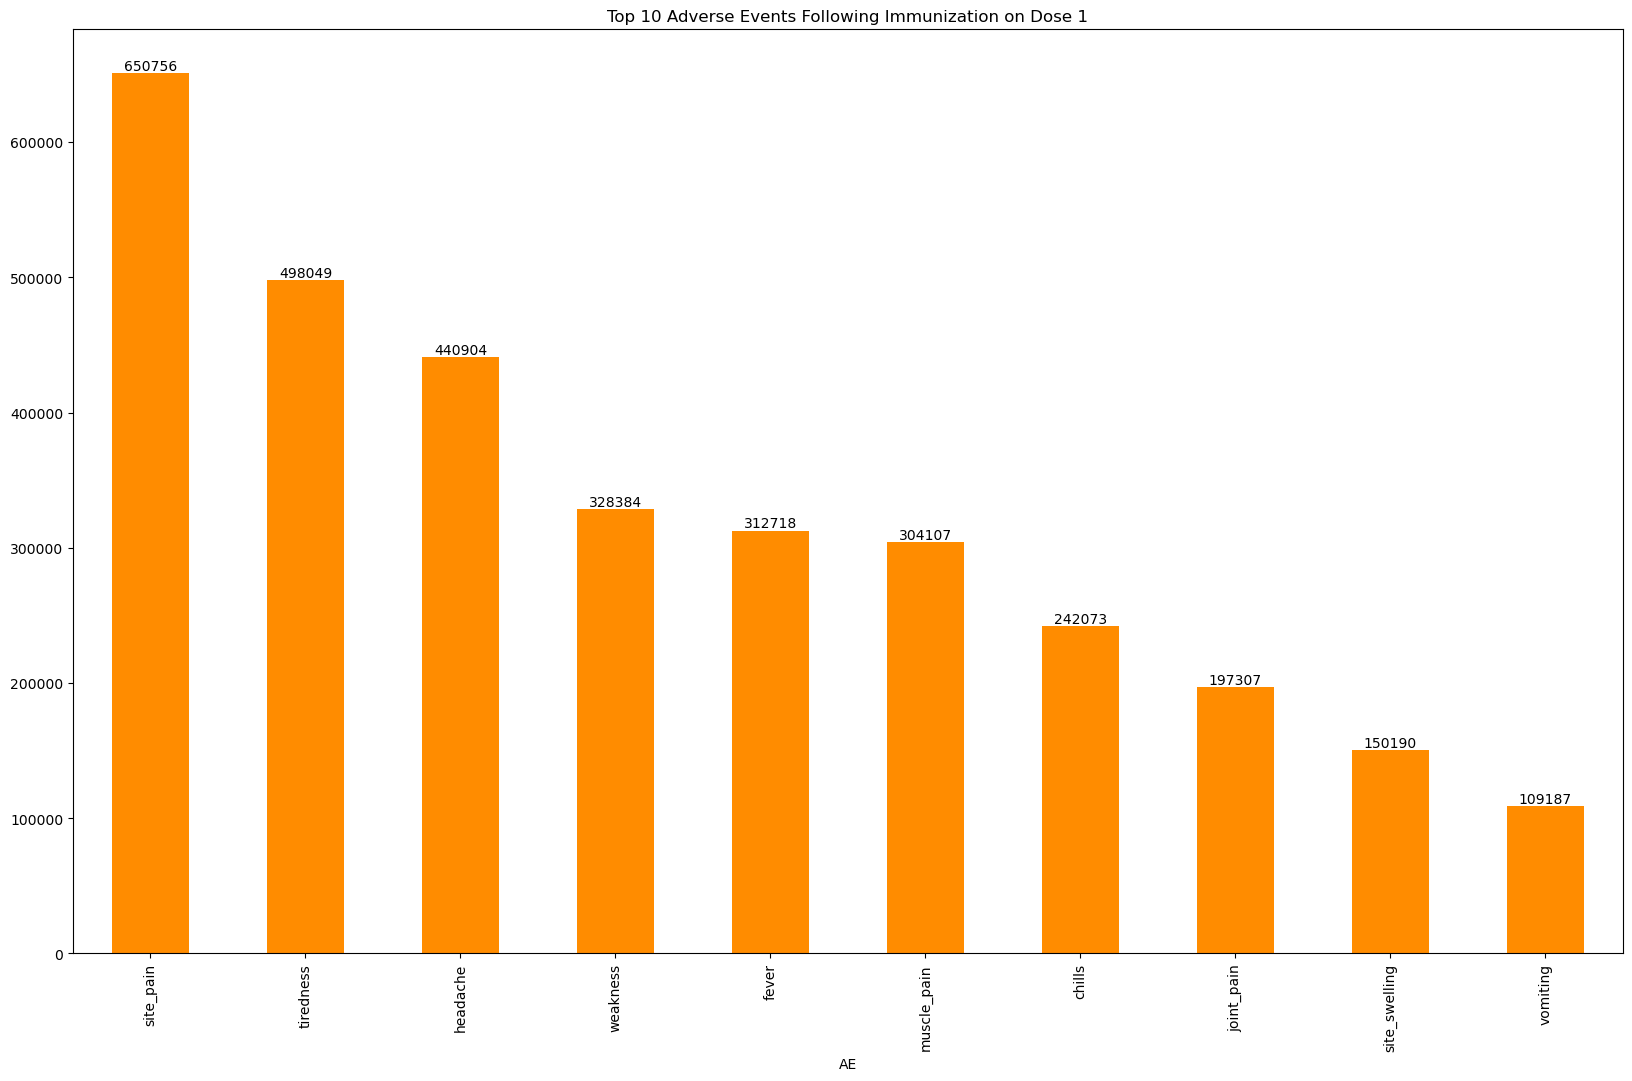

In [20]:
# dose1 bar chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose1_summ = aefi_dose1_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose1_summ_plt_bar = aefi_dose1_summ.plot(kind='bar', stacked=True,figsize=(20,12),
                                               title = 'Top 10 Adverse Events Following Immunization on Dose 1',
                                               color = {"darkorange"})

for container in aefi_dose1_summ_plt_bar.containers:
    aefi_dose1_summ_plt_bar.bar_label(container)

<AxesSubplot:title={'center':'Top 10 Adverse Events Following Immunization on Dose 1'}, ylabel='count'>

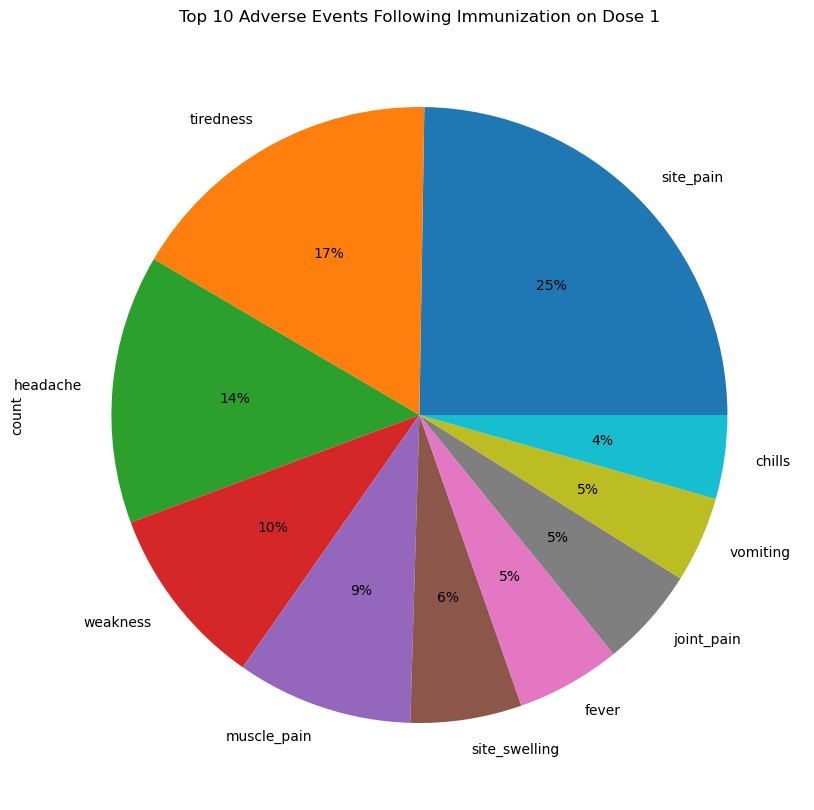

In [21]:
# dose 2 Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose2_summ = aefi_dose2_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose2_summ.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10),
                     title = 'Top 10 Adverse Events Following Immunization on Dose 1')

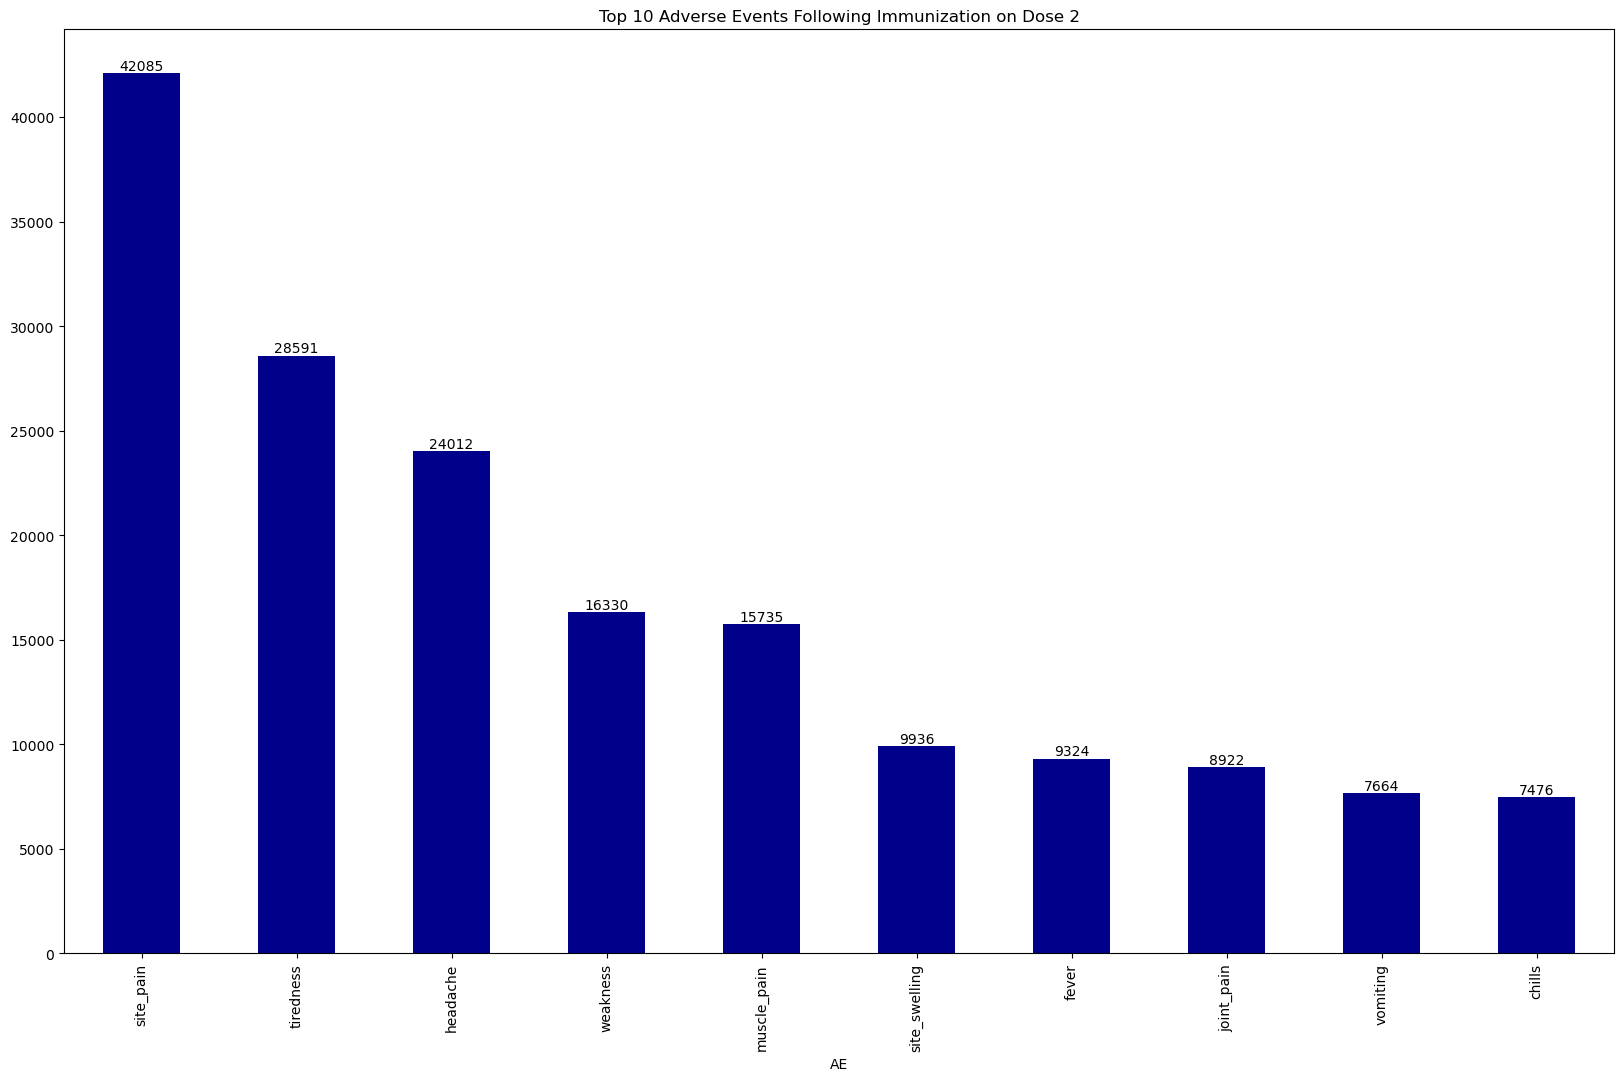

In [22]:
# dose2 bar chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose2_summ = aefi_dose2_l.groupby(['AE'])['count'].sum().nlargest(10)
plt = aefi_dose2_summ.plot(kind='bar', stacked=True,figsize=(20,12), 
                           title = 'Top 10 Adverse Events Following Immunization on Dose 2', 
                           color = "darkblue")

for container in plt.containers:
    plt.bar_label(container)

In [23]:
# dose 1 concatinate with dose 2 dataframe
aefi_dose12_final = pd.concat([aefi_dose1_l,aefi_dose2_l],axis=0)
aefi_dose12_final

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     1
                       site_swelling      0     1
                       site_redness       0     1
                       tiredness          0     1
                       headache           0     1
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[36504 rows x 2 columns]

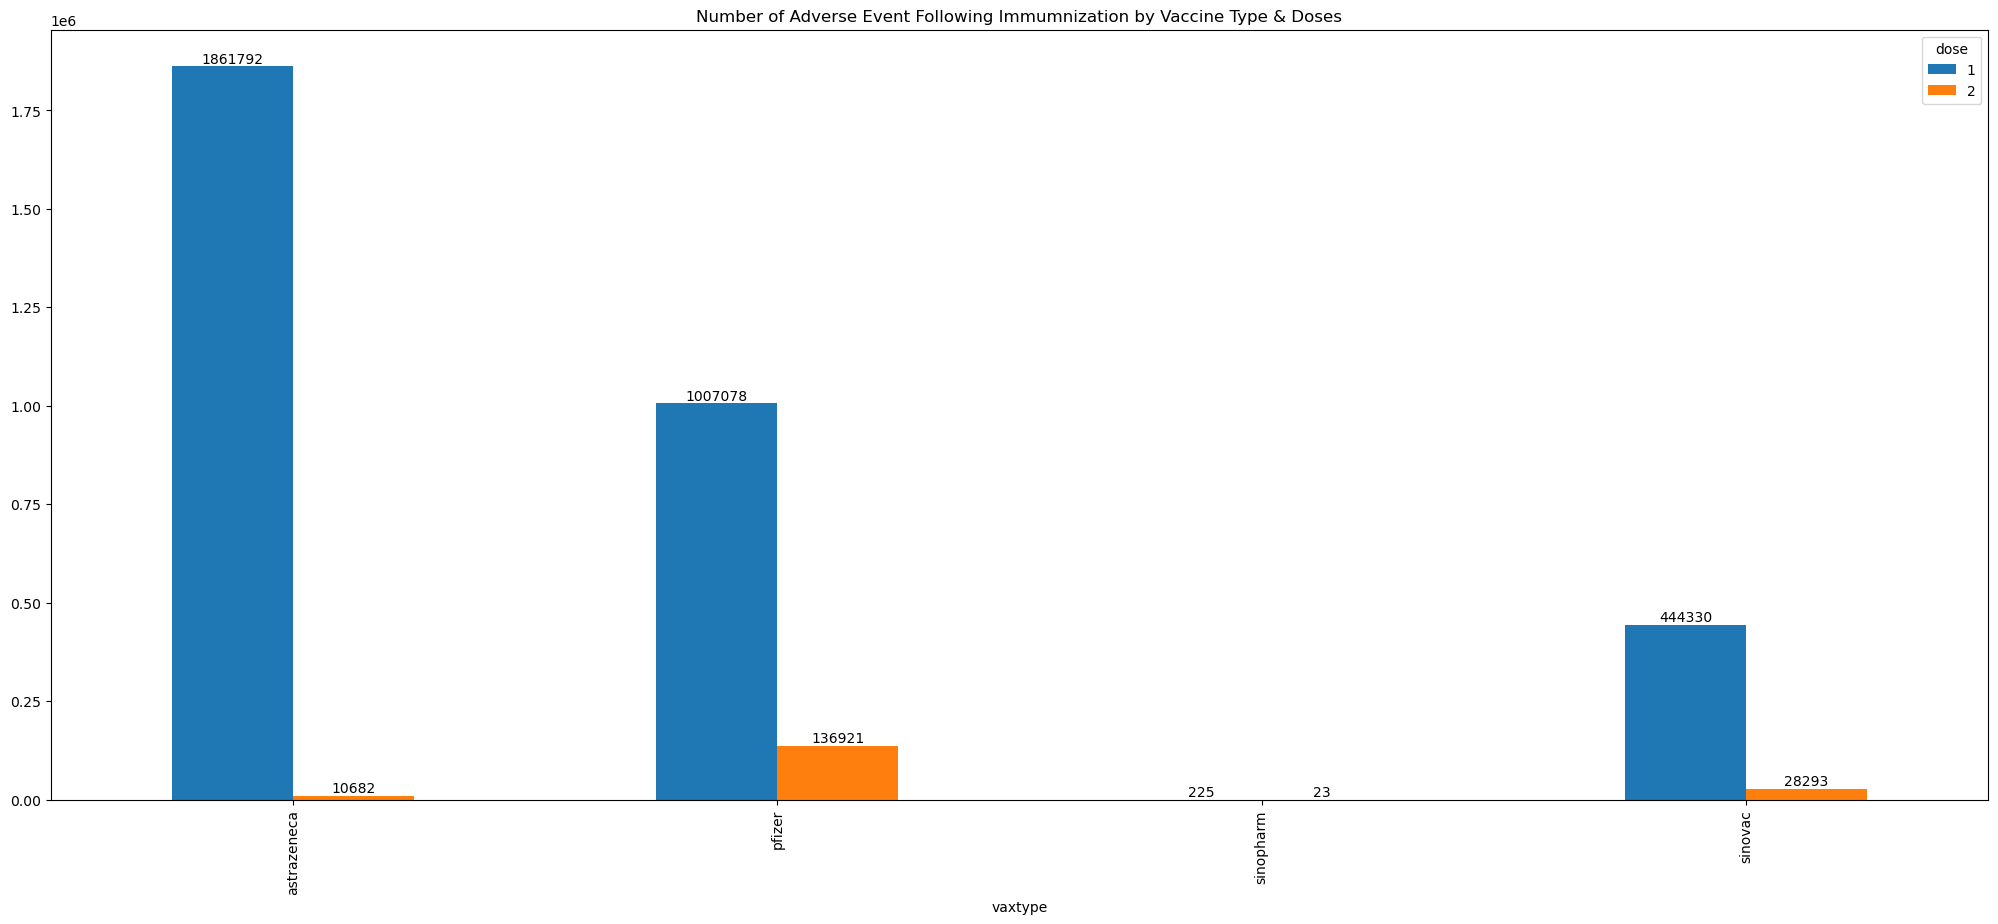

In [24]:
# barchart by vaccine brand
vaxtype_summ_ae = aefi_dose12_final.groupby(['vaxtype', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=False ,figsize=(25,10), 
                                                                                               title = 'Number of Adverse Event Following Immumnization by Vaccine Type & Doses')

plt_2 = vaxtype_summ_ae

for container in plt_2.containers:
    plt_2.bar_label(container, fmt="%1d")

<AxesSubplot:ylabel='count'>

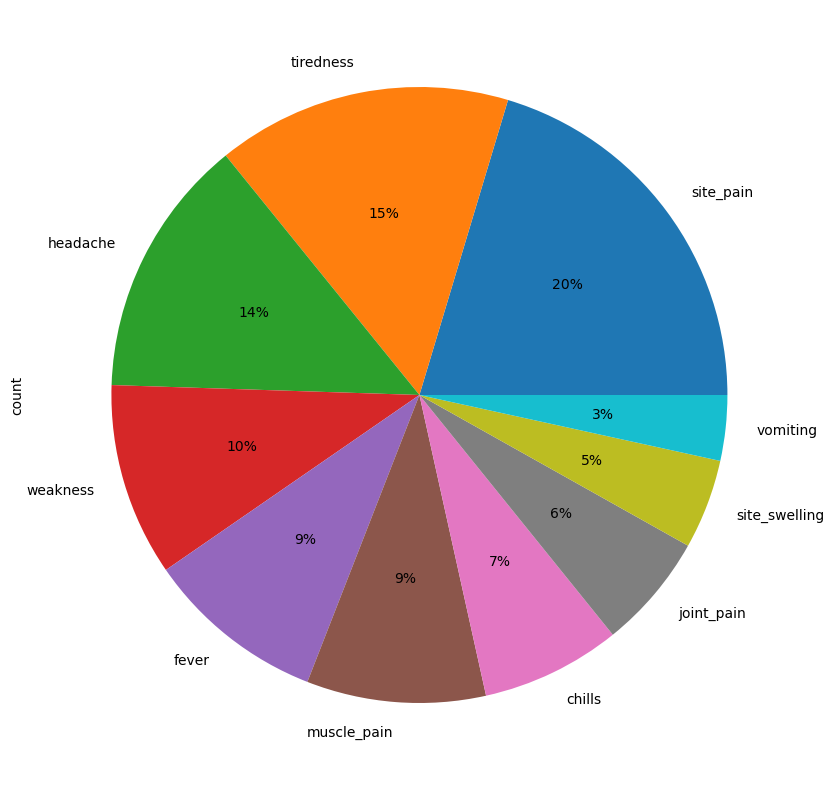

In [26]:
# regardless of dose (SAE inclusive) Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose12_summ = aefi_dose12_final.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose12_summ.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10))

<AxesSubplot:ylabel='count'>

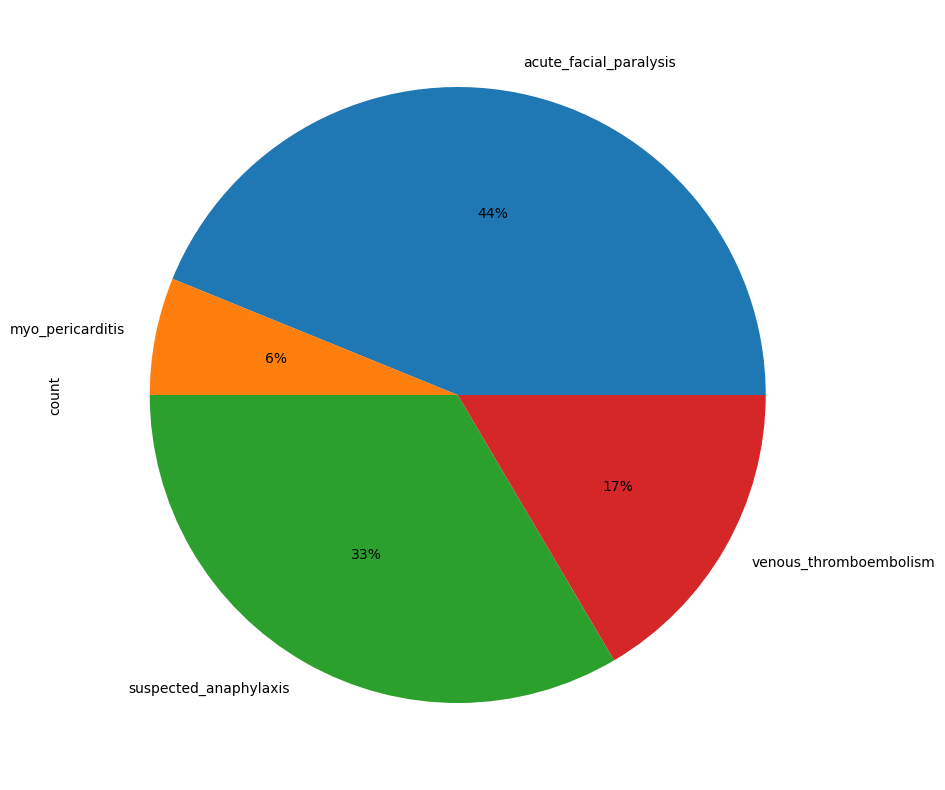

In [27]:
# Serious AE 
# aefi_serious = aefi_full[['date','vaxtype','suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis']]
aefi_serious
aefi_serious_l = pd.melt(aefi_serious, id_vars= ['date','vaxtype'], value_vars=['suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis'])

aefi_serious_l.rename(columns = {'value':'count','variable':'AE'}, inplace = True)
aefi_serious_l

aefi_serious_l_summ_pie = aefi_serious_l.groupby(['AE'])['count'].sum()
aefi_serious_l_summ_pie.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10))


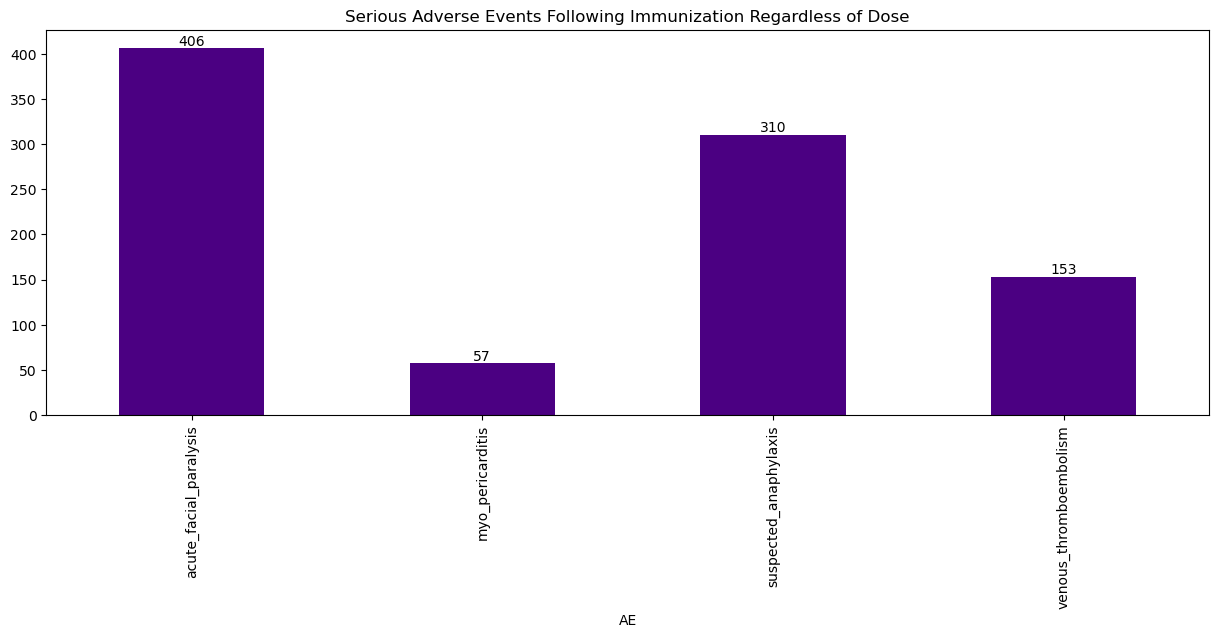

In [28]:
# Serious AE 
# aefi_serious = aefi_full[['date','vaxtype','suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis']]
aefi_serious
aefi_serious_l = pd.melt(aefi_serious, id_vars= ['date','vaxtype'], value_vars=['suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis'])

aefi_serious_l.rename(columns = {'value':'count','variable':'AE'}, inplace = True)
aefi_serious_l

aefi_serious_l_summ_bar = aefi_serious_l.groupby(['AE'])['count'].sum()
aefi_serious_l_summ_bar_plt = aefi_serious_l_summ_bar.plot(kind='bar', stacked=True, figsize=(15,5), 
                                                           title = 'Serious Adverse Events Following Immunization Regardless of Dose', 
                                                           color = "indigo")

for container in aefi_serious_l_summ_bar_plt.containers:
    aefi_serious_l_summ_bar_plt.bar_label(container)

In [29]:
#### Analysis to compare total vaxed vs Adverse Events Following Immunization (AEFI)
### Datasets used:
### Vax Malaysia: Contains all number of vaxcinations (dose 1 and dose 2)
### AEFI: contains all adverse events after vax dose 1 and dose 2
### data_repo contains all datasets required


In [30]:
### AEFI stacked by doses dataset

aefi_dose12_final2 = aefi_dose12_final.reset_index()

## Convert date to datetime data type
aefi_dose12_final2['date'] = pd.to_datetime(aefi_dose12_final2['date'])

### For bar plots, transform dates into a format of Year-Month for better plotting
aefi_dose12_final2['date_shrt'] = pd.to_datetime(aefi_dose12_final2['date']).dt.strftime('%Y-%m')
aefi_dose12_final2

,date,vaxtype,AE,count,dose,date_shrt
0,2021-01-13,astrazeneca,site_pain,0,1,2021-01
1,2021-01-13,astrazeneca,site_swelling,0,1,2021-01
2,2021-01-13,astrazeneca,site_redness,0,1,2021-01
3,2021-01-13,astrazeneca,tiredness,0,1,2021-01
4,2021-01-13,astrazeneca,headache,0,1,2021-01
...,...,...,...,...,...,...
36499,2022-06-07,sinovac,weakness,0,2,2022-06
36500,2022-06-07,sinovac,fever,0,2,2022-06
36501,2022-06-07,sinovac,vomiting,0,2,2022-06
36502,2022-06-07,sinovac,chills,0,2,2022-06


In [31]:
# Vax Malaysia data

vax_my = data_repo['vax_malaysia'].copy()

## Convert date to datetime data type
vax_my['date'] = pd.to_datetime(vax_my['date'])

### For bar plots, transform dates into a format of Year-Month for better plotting
vax_my['date_shrt'] = pd.to_datetime(vax_my['date']).dt.strftime('%Y-%m')
vax_my

,date,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,...,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4,date_shrt
0,2021-02-24,66,3,0,0,69,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2021-02
1,2021-02-25,1150,2,0,0,1152,0,0,0,0,...,0,0,0,0,0,3,0,0,0,2021-02
2,2021-02-26,4103,3,0,0,4106,0,0,0,0,...,0,0,0,0,0,7,0,0,0,2021-02
3,2021-02-27,6721,6,0,0,6727,0,0,0,0,...,0,0,0,0,0,21,0,0,0,2021-02
4,2021-02-28,6718,6,0,0,6724,0,1,0,0,...,0,0,0,0,0,4,0,0,0,2021-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2022-12-01,179,155,582,2519,3435,11,6,93,1,...,0,1,0,0,0,0,0,2,11,2022-12
646,2022-12-02,226,255,581,2186,3248,10,18,188,2,...,1,0,0,0,0,0,0,0,1,2022-12
647,2022-12-03,180,232,372,1356,2140,6,16,90,0,...,0,0,0,0,0,0,0,0,0,2022-12
648,2022-12-04,87,102,210,854,1253,3,4,62,0,...,0,0,0,0,0,0,0,6,0,2022-12


In [32]:
### Describe dist of dates in Vax Malaysia
vax_my['date'].describe()

/var/folders/cx/g4y271hj7x19byxrpn3y_z5h0000gn/T/ipykernel_2735/3660991982.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vax_my['date'].describe()


count                     650
unique                    650
top       2021-02-24 00:00:00
freq                        1
first     2021-02-24 00:00:00
last      2022-12-05 00:00:00
Name: date, dtype: object

In [33]:
### Describe dist of dates in AEFI

aefi_dose12_final2['date'].describe()

/var/folders/cx/g4y271hj7x19byxrpn3y_z5h0000gn/T/ipykernel_2735/208517712.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aefi_dose12_final2['date'].describe()


count                   36504
unique                    469
top       2022-06-07 00:00:00
freq                       96
first     2021-01-13 00:00:00
last      2022-06-07 00:00:00
Name: date, dtype: object

In [34]:
### Define the overlap period of time between Vax Malaysia data and AEFI datasets 
### in order to compare total vaxed vs adverse events within the same period of time

### Take the latest date from the earliest dates of Vax Malaysia and AEFI, that's the start date 
start_dt = np.max([vax_my['date'].min(), aefi_dose12_final2['date'].min()])

### Take the earliest date from the latest dates of Vax Malaysia and AEFI, that's the end date
end_dt = np.min([vax_my['date'].max(), aefi_dose12_final2['date'].max()])

print("start date: ", start_dt)
print("end date: ", end_dt)

start date:  2021-02-24 00:00:00
end date:  2022-06-07 00:00:00


In [35]:
### Apply filter to only include records between start date and end date
vax_my_flt = vax_my[((vax_my['date'] >= start_dt) & (vax_my['date'] <= end_dt))].copy()
print(vax_my_flt.shape)
vax_my_flt.head()

(469, 51)


,date,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,daily_booster2_adol,...,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4,date_shrt
0,2021-02-24,66,3,0,0,69,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2021-02
1,2021-02-25,1150,2,0,0,1152,0,0,0,0,...,0,0,0,0,0,3,0,0,0,2021-02
2,2021-02-26,4103,3,0,0,4106,0,0,0,0,...,0,0,0,0,0,7,0,0,0,2021-02
3,2021-02-27,6721,6,0,0,6727,0,0,0,0,...,0,0,0,0,0,21,0,0,0,2021-02
4,2021-02-28,6718,6,0,0,6724,0,1,0,0,...,0,0,0,0,0,4,0,0,0,2021-02


In [36]:
### Create a dataset stacked by full date (year, month, day) for distribtuion plot
vax_my_dist = vax_my_flt[[ 'date', 'daily_partial', 'daily_full']].groupby('date').sum().reset_index()

vax_my_dist_dose1 = vax_my_dist[['date', 'daily_partial']].rename(columns={'daily_partial': 'count'})
vax_my_dist_dose1['dose'] = 1
vax_my_dist_dose2 = vax_my_dist[['date', 'daily_full']].rename(columns={'daily_full': 'count'})
vax_my_dist_dose2['dose'] = 2

vax_my_dist_stacked  = pd.concat([vax_my_dist_dose1, vax_my_dist_dose2])

vax_my_dist_stacked.head()

,date,count,dose
0,2021-02-24,66,1
1,2021-02-25,1150,1
2,2021-02-26,4103,1
3,2021-02-27,6721,1
4,2021-02-28,6718,1


In [37]:
### Create a dataset staacked by full date (year, month) for Bar plot

vax_my_tmp = vax_my_flt[[ 'date_shrt', 'daily_partial', 'daily_full']].groupby('date_shrt').sum().reset_index()

vax_my_tmp_dose1 = vax_my_tmp[['date_shrt', 'daily_partial']].rename(columns={'daily_partial': 'count'})
vax_my_tmp_dose1['dose'] = 1
vax_my_tmp_dose2 = vax_my_tmp[['date_shrt', 'daily_full']].rename(columns={'daily_full': 'count'})
vax_my_tmp_dose2['dose'] = 2

vax_my_stacked  = pd.concat([vax_my_tmp_dose1, vax_my_tmp_dose2])

vax_my_stacked.head()

,date_shrt,count,dose
0,2021-02,18758,1
1,2021-03,469733,1
2,2021-04,415528,1
3,2021-05,1045093,1
4,2021-06,4015583,1


In [38]:
### Apply filter to only include records between start date and end date


aefi_dose12_final2_flt = aefi_dose12_final2[((aefi_dose12_final2['date'] >= start_dt) & (aefi_dose12_final2['date'] <= end_dt))].copy()

aefi_dose12_final2_flt_stacked = aefi_dose12_final2_flt[['date_shrt', 'dose', 'count']].groupby(['date_shrt', 'dose' ]).sum().reset_index()
print(aefi_dose12_final2_flt_stacked.shape)
aefi_dose12_final2_flt_stacked.head()

(34, 3)


,date_shrt,dose,count
0,2021-02,1,0
1,2021-02,2,0
2,2021-03,1,60551
3,2021-03,2,5180
4,2021-04,1,74492


In [39]:
### Create a dataset staacked by full date (year, month, day) for distribution plot

aefi_dose12_final2_flt_dist_stacked = aefi_dose12_final2_flt[['date', 'dose', 'count']].groupby(['date', 'dose' ]).sum().reset_index()
aefi_dose12_final2_flt_dist_stacked.head()

,date,dose,count
0,2021-02-25,1,0
1,2021-02-25,2,0
2,2021-02-26,1,0
3,2021-02-26,2,0
4,2021-02-27,1,0


In [40]:
### Combine Vax malaysia stacked dataset with AEFI stacked dataset for Bar plots

vax_my_stacked['group'] = 'Total Vaxed' 
aefi_dose12_final2_flt_stacked['group'] = 'AE'
total_vax_nd_ae_stacked = pd.concat([vax_my_stacked, aefi_dose12_final2_flt_stacked])

total_vax_nd_ae_stacked.groupby(['date_shrt','group', 'dose']).sum()

count
date_shrt group       dose        
2021-02   AE          1          0
                      2          0
          Total Vaxed 1      18758
                      2         20
2021-03   AE          1      60551
...                            ...
2022-05   Total Vaxed 2     348142
2022-06   AE          1         28
                      2         12
          Total Vaxed 1       8810
                      2      27708

[68 rows x 1 columns]

In [41]:
### Total number of events by dose and either Total Vax vs AE

total_vax_nd_ae_stacked.drop('date_shrt', axis=1).groupby(['group', 'dose']).sum()

count
group       dose          
AE          1      3313425
            2       175919
Total Vaxed 1     27831038
            2     27136565

In [42]:
### Combine Vax malaysia stacked dataset with AEFI stacked dataset for distribution plots


vax_my_dist_stacked['group'] = 'Total Vaxed' 
aefi_dose12_final2_flt_dist_stacked['group'] = 'AE'
total_vax_nd_ae_dist_stacked = pd.concat([vax_my_dist_stacked, aefi_dose12_final2_flt_dist_stacked])

total_vax_nd_ae_dist_stacked.groupby(['date','group', 'dose']).sum()


count
date       group       dose       
2021-02-24 Total Vaxed 1        66
                       2         3
2021-02-25 AE          1         0
                       2         0
           Total Vaxed 1      1150
...                            ...
2022-06-06 Total Vaxed 2      1348
2022-06-07 AE          1         1
                       2        12
           Total Vaxed 1       599
                       2      3745

[1874 rows x 1 columns]

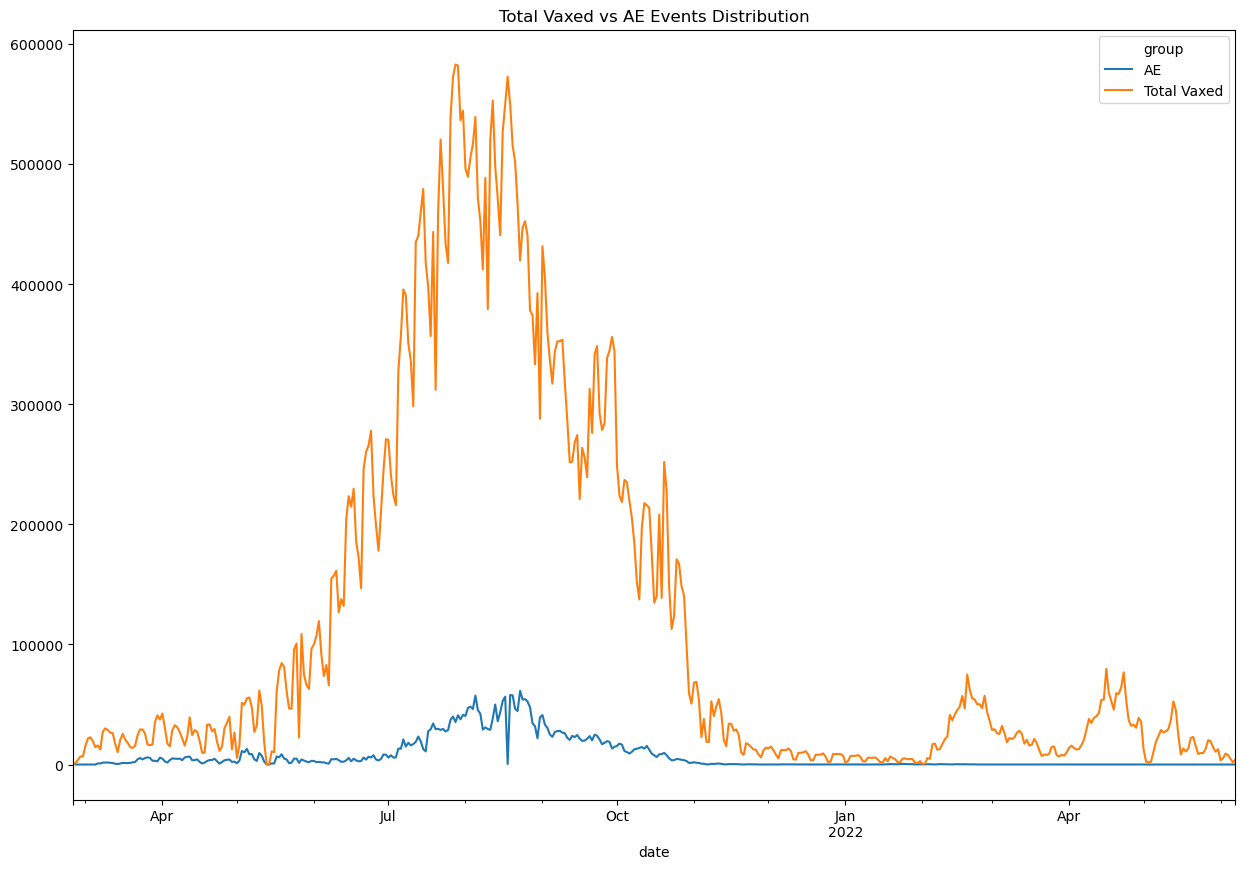

In [44]:
### Plotting distribtion plot showing trends of AEFI vs Total Vax over the study period 
### 2021-02-24 ==> 2022-06-07 
import matplotlib.pyplot as plt

aefi_by_time = total_vax_nd_ae_dist_stacked.groupby(['date','group'])['count'].sum().unstack().plot(figsize=(15,10),  title = 'Total Vaxed vs AE Events Distribution')
aefi_by_time


# plt.show()
plt.savefig('total_vax_vs_aefi_by_dose_dist.jpg')


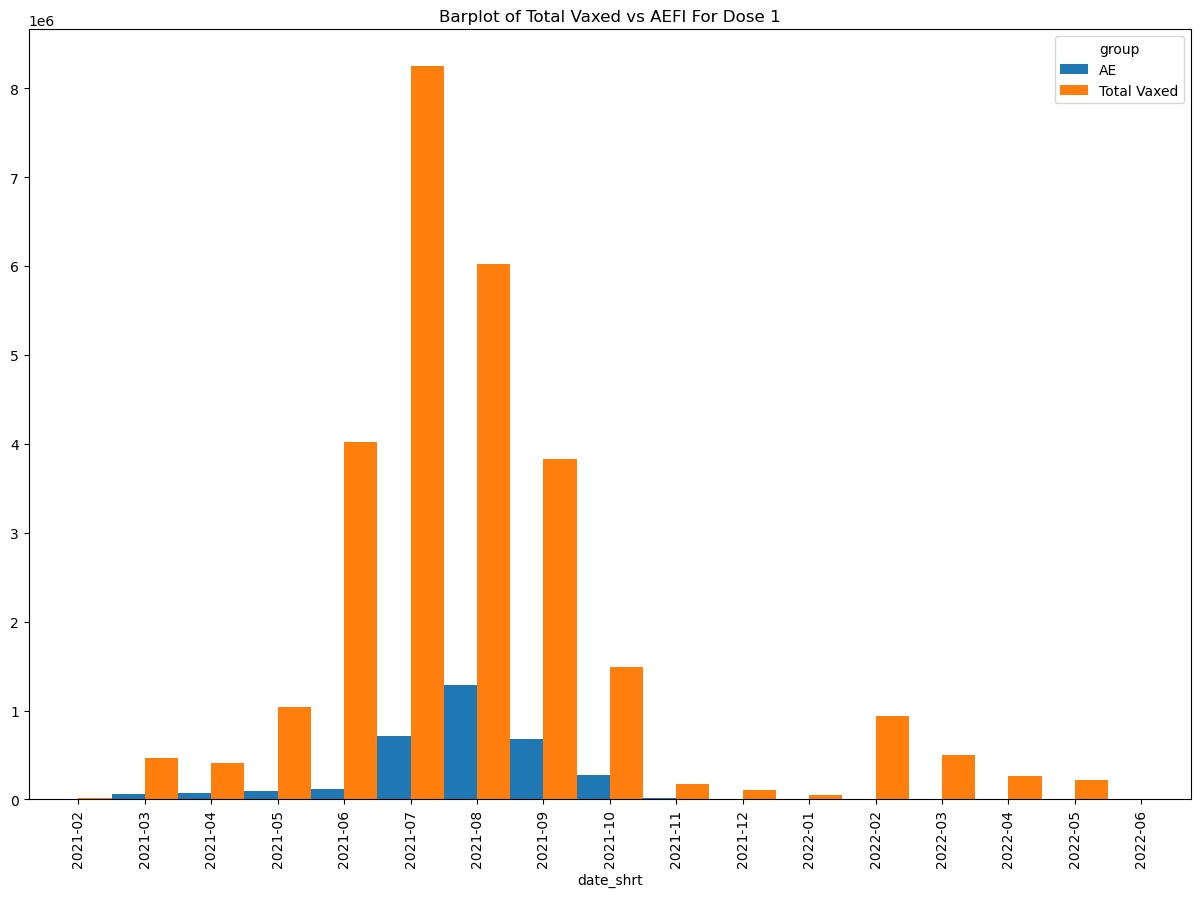

In [45]:
### Plotting barplot showing trends of Total Vaxed vd AEFI for dose 1 over the study period 
### 2021-02-24 ==> 2022-06-07 
total_vax_nd_ae_stacked_dose1 = total_vax_nd_ae_stacked.loc[ total_vax_nd_ae_stacked['dose']==1, ['date_shrt', 'group', 'count']].copy()


plt_tmp = total_vax_nd_ae_stacked_dose1.groupby(['date_shrt', 'group'])['count'].sum().unstack().plot(kind='bar',width=1, stacked=False, figsize=(15,10), 
                                                                                         title = 'Barplot of Total Vaxed vs AEFI For Dose 1')
plt_tmp

plt.savefig('total_vax_vs_aefi_for_dose1_barplot.jpg')



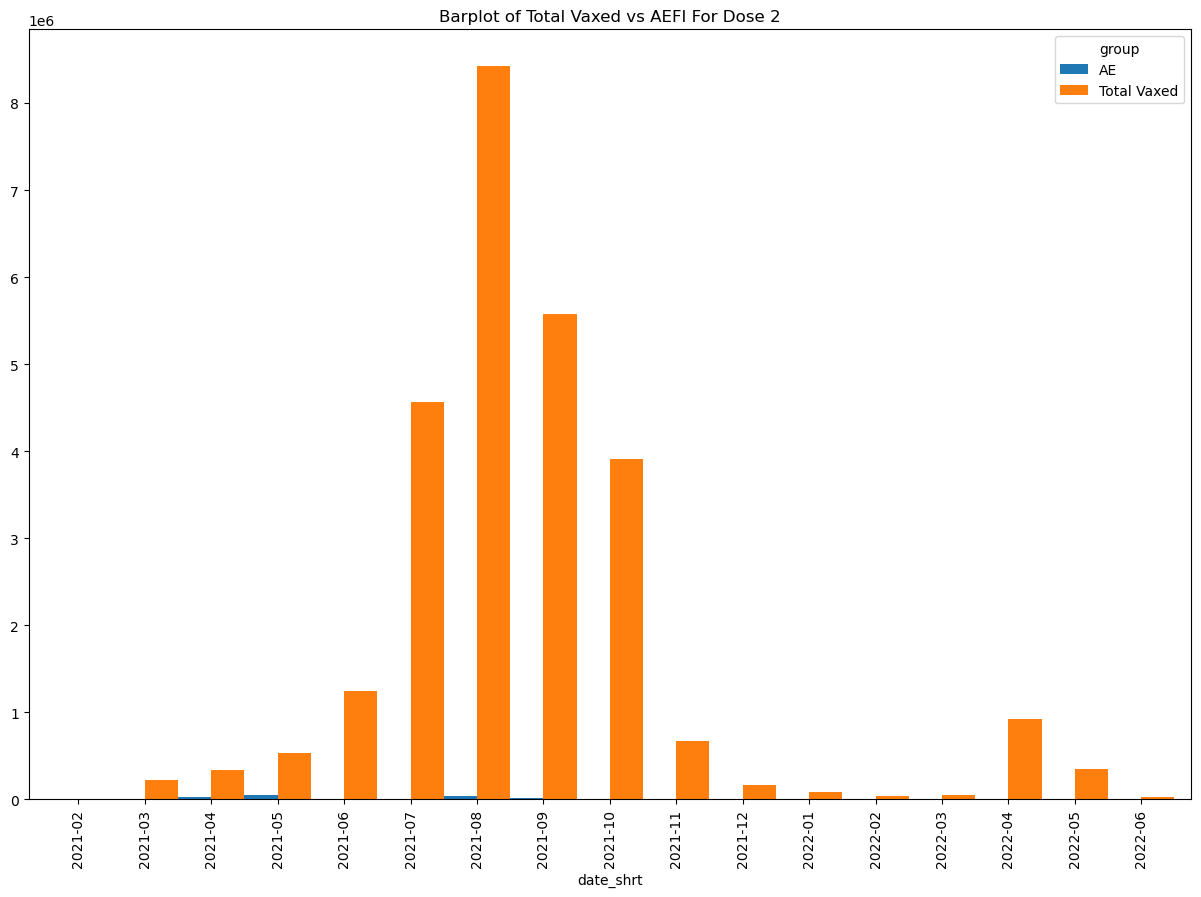

In [46]:
### Plotting barplot showing trends of Total Vaxed vd AEFI for dose 2 over the study period 
### 2021-02-24 ==> 2022-06-07 
total_vax_nd_ae_stacked_dose2 = total_vax_nd_ae_stacked.loc[ total_vax_nd_ae_stacked['dose']==2, ['date_shrt', 'group', 'count']].copy()


# trend of adverse event distribution pattern overtime by dosing 
plt_tmp = total_vax_nd_ae_stacked_dose2.groupby(['date_shrt', 'group'])['count'].sum().unstack().plot(kind='bar',width=1, stacked=False, figsize=(15,10), 
                                                                                         title = 'Barplot of Total Vaxed vs AEFI For Dose 2')
plt_tmp

plt.savefig('total_vax_vs_aefi_for_dose2_barplot.jpg')


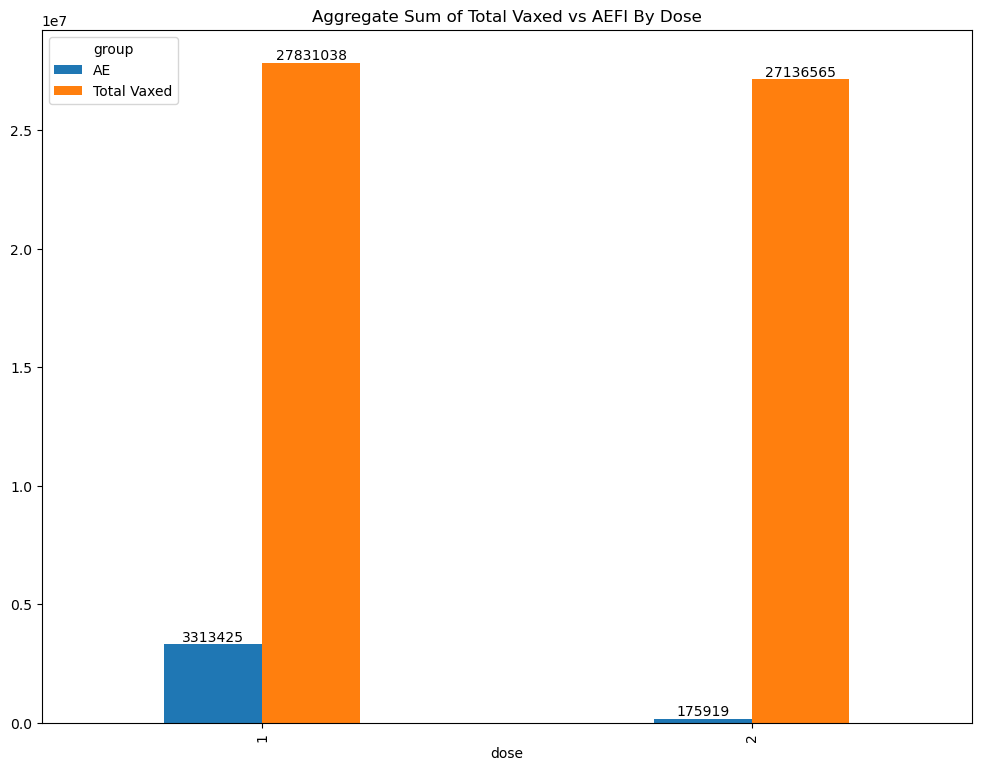

In [47]:
### Plotting barplot showing aggregated sum of total vaxed vs AEFI by dose over the study period 
### 2021-02-24 ==> 2022-06-07 
plt_tmp = total_vax_nd_ae_stacked.groupby(['dose', 'group'])['count'].sum().unstack().plot(kind='bar',width=0.4, stacked=False, figsize=(12,9), 
                                                                                         title = 'Aggregate Sum of Total Vaxed vs AEFI By Dose')
plt_tmp

for container in plt_tmp.containers:
    plt_tmp.bar_label(container, fmt="%1d")


plt.savefig('agg_total_vax_vs_aefi_by_dose_barplot.jpg')
